In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [2]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris['label'] = iris.species.map({'setosa':1, 'versicolor':2,'virginica':3})

In [4]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species',
       'label'],
      dtype='object')

In [5]:
iris.shape


(150, 6)

In [6]:
iris.isnull().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
label           False
dtype: bool

<AxesSubplot:ylabel='species'>

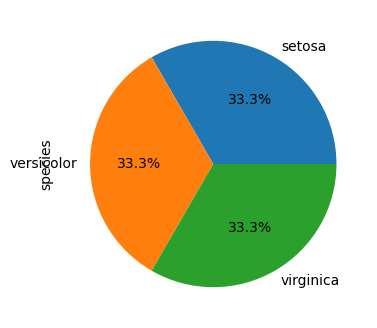

In [7]:
iris.species.value_counts().plot(kind = "pie", autopct= "%.1f%%", figsize = (4,4) )

In [8]:
iris.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

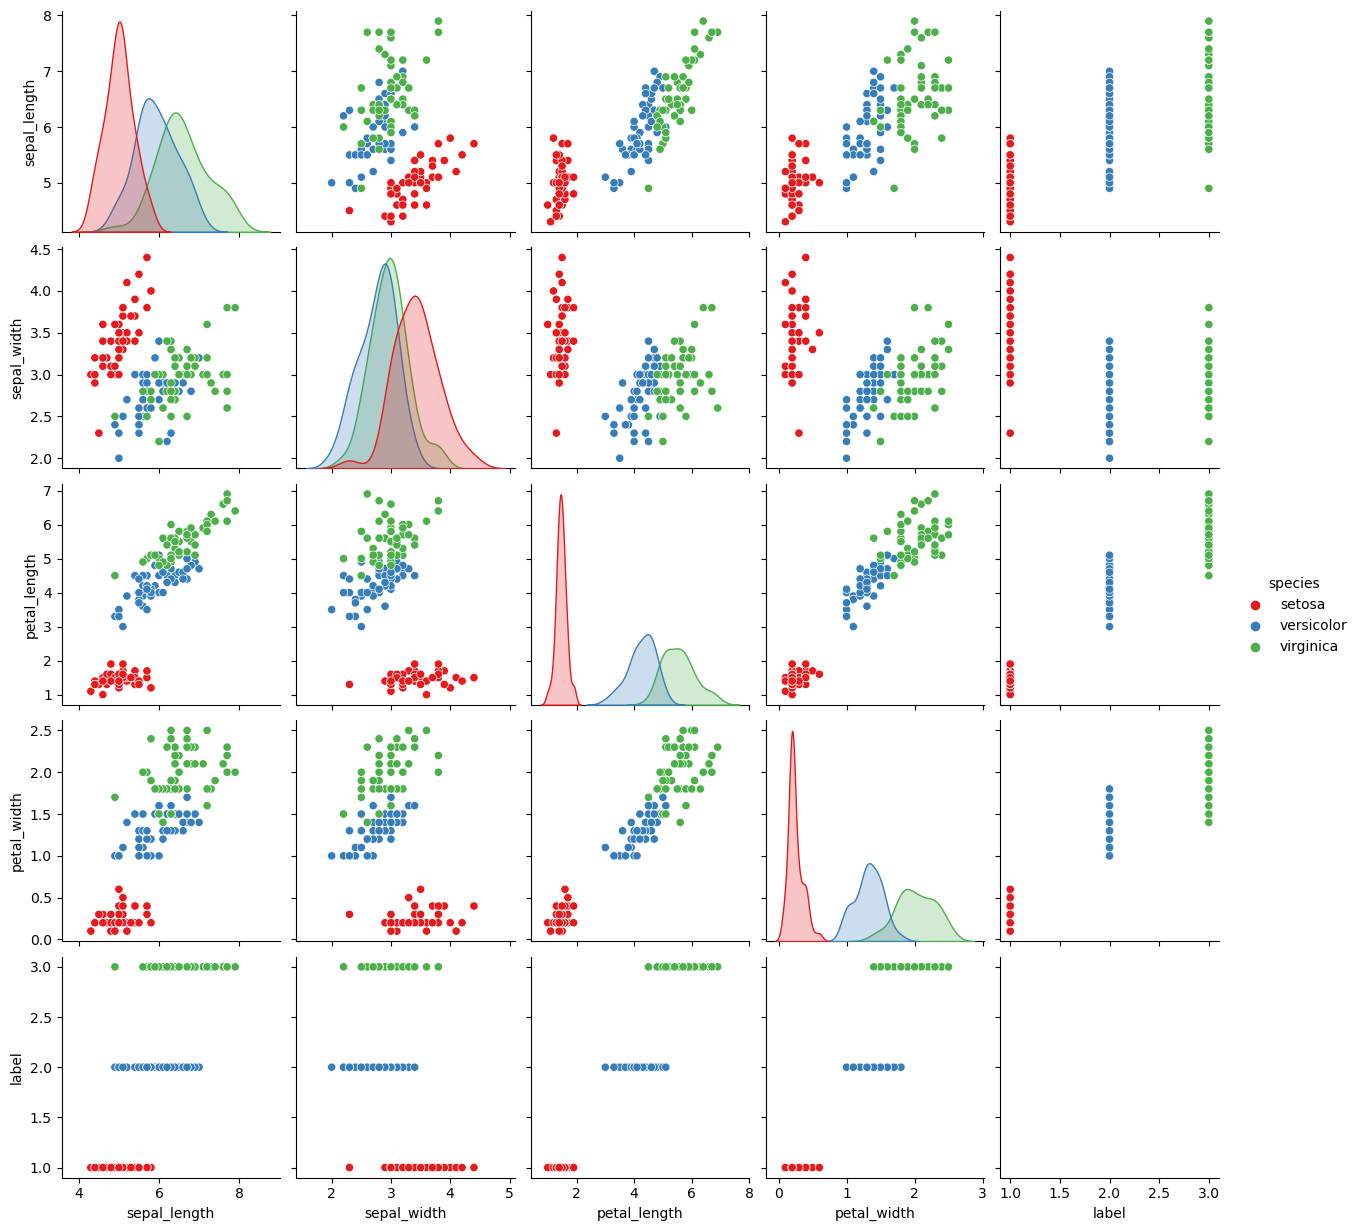

In [9]:
sns.pairplot(iris, hue = "species" , palette = 'Set1')

In [10]:
from sklearn.model_selection import train_test_split

X = iris.drop(['species','label'], axis=1)
Y = iris['label'] 

X_train, X_test, Y_train,Y_test = train_test_split(X,Y, test_size=0.10)

len(X)

150

### Decision tree

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,multilabel_confusion_matrix,accuracy_score,confusion_matrix

dtree = DecisionTreeClassifier()
dtree.fit(X_train,Y_train)
dtree_model = dtree.predict(X_test)

print(classification_report(Y_test,dtree_model))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       0.83      1.00      0.91         5
           3       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15



In [12]:
print(confusion_matrix(Y_test,dtree_model))

[[5 0 0]
 [0 5 0]
 [0 1 4]]


In [13]:
multilabel_confusion_matrix(Y_test,dtree_model)

array([[[10,  0],
        [ 0,  5]],

       [[ 9,  1],
        [ 0,  5]],

       [[10,  0],
        [ 1,  4]]], dtype=int64)

In [14]:
p= dtree.predict([[5.9,3.0,5.1,1.8]])
print(p)

[3]


D:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


[Text(0.4, 0.9166666666666666, 'X[2] <= 2.45\ngini = 0.667\nsamples = 135\nvalue = [45, 45, 45]'),
 Text(0.3, 0.75, 'gini = 0.0\nsamples = 45\nvalue = [45, 0, 0]'),
 Text(0.5, 0.75, 'X[3] <= 1.75\ngini = 0.5\nsamples = 90\nvalue = [0, 45, 45]'),
 Text(0.2, 0.5833333333333334, 'X[2] <= 4.95\ngini = 0.153\nsamples = 48\nvalue = [0, 44, 4]'),
 Text(0.1, 0.4166666666666667, 'gini = 0.0\nsamples = 42\nvalue = [0, 42, 0]'),
 Text(0.3, 0.4166666666666667, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.2, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.4, 0.25, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.3, 0.08333333333333333, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.5, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.8, 0.5833333333333334, 'X[2] <= 4.85\ngini = 0.046\nsamples = 42\nvalue = [0, 1, 41]'),
 Text(0.7, 0.4166666666666667, 'X[0] <= 5.95\ngini = 0.444\nsamples = 3\nvalue = [0, 1

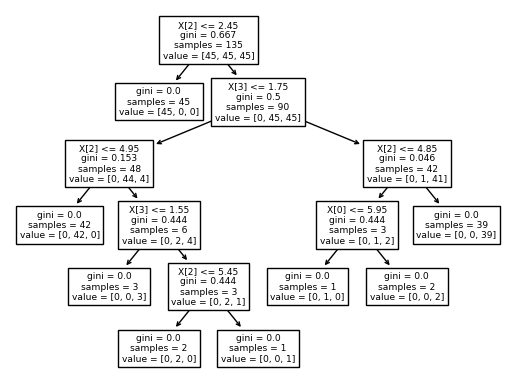

In [15]:
from sklearn import tree
tree.plot_tree(dtree)

## Model evaluation

In [16]:
def evaluate_model(obj_clsf):
    print("Training accuracy : ",accuracy_score(Y_train, obj_clsf.predict(X_train)))
    print("Testing accuracy : ",accuracy_score(Y_test, obj_clsf.predict(X_test)))
    print(classification_report(Y_test, obj_clsf.predict(X_test)))

In [17]:
evaluate_model(dtree)

Training accuracy :  1.0
Testing accuracy :  0.9333333333333333
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       0.83      1.00      0.91         5
           3       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15



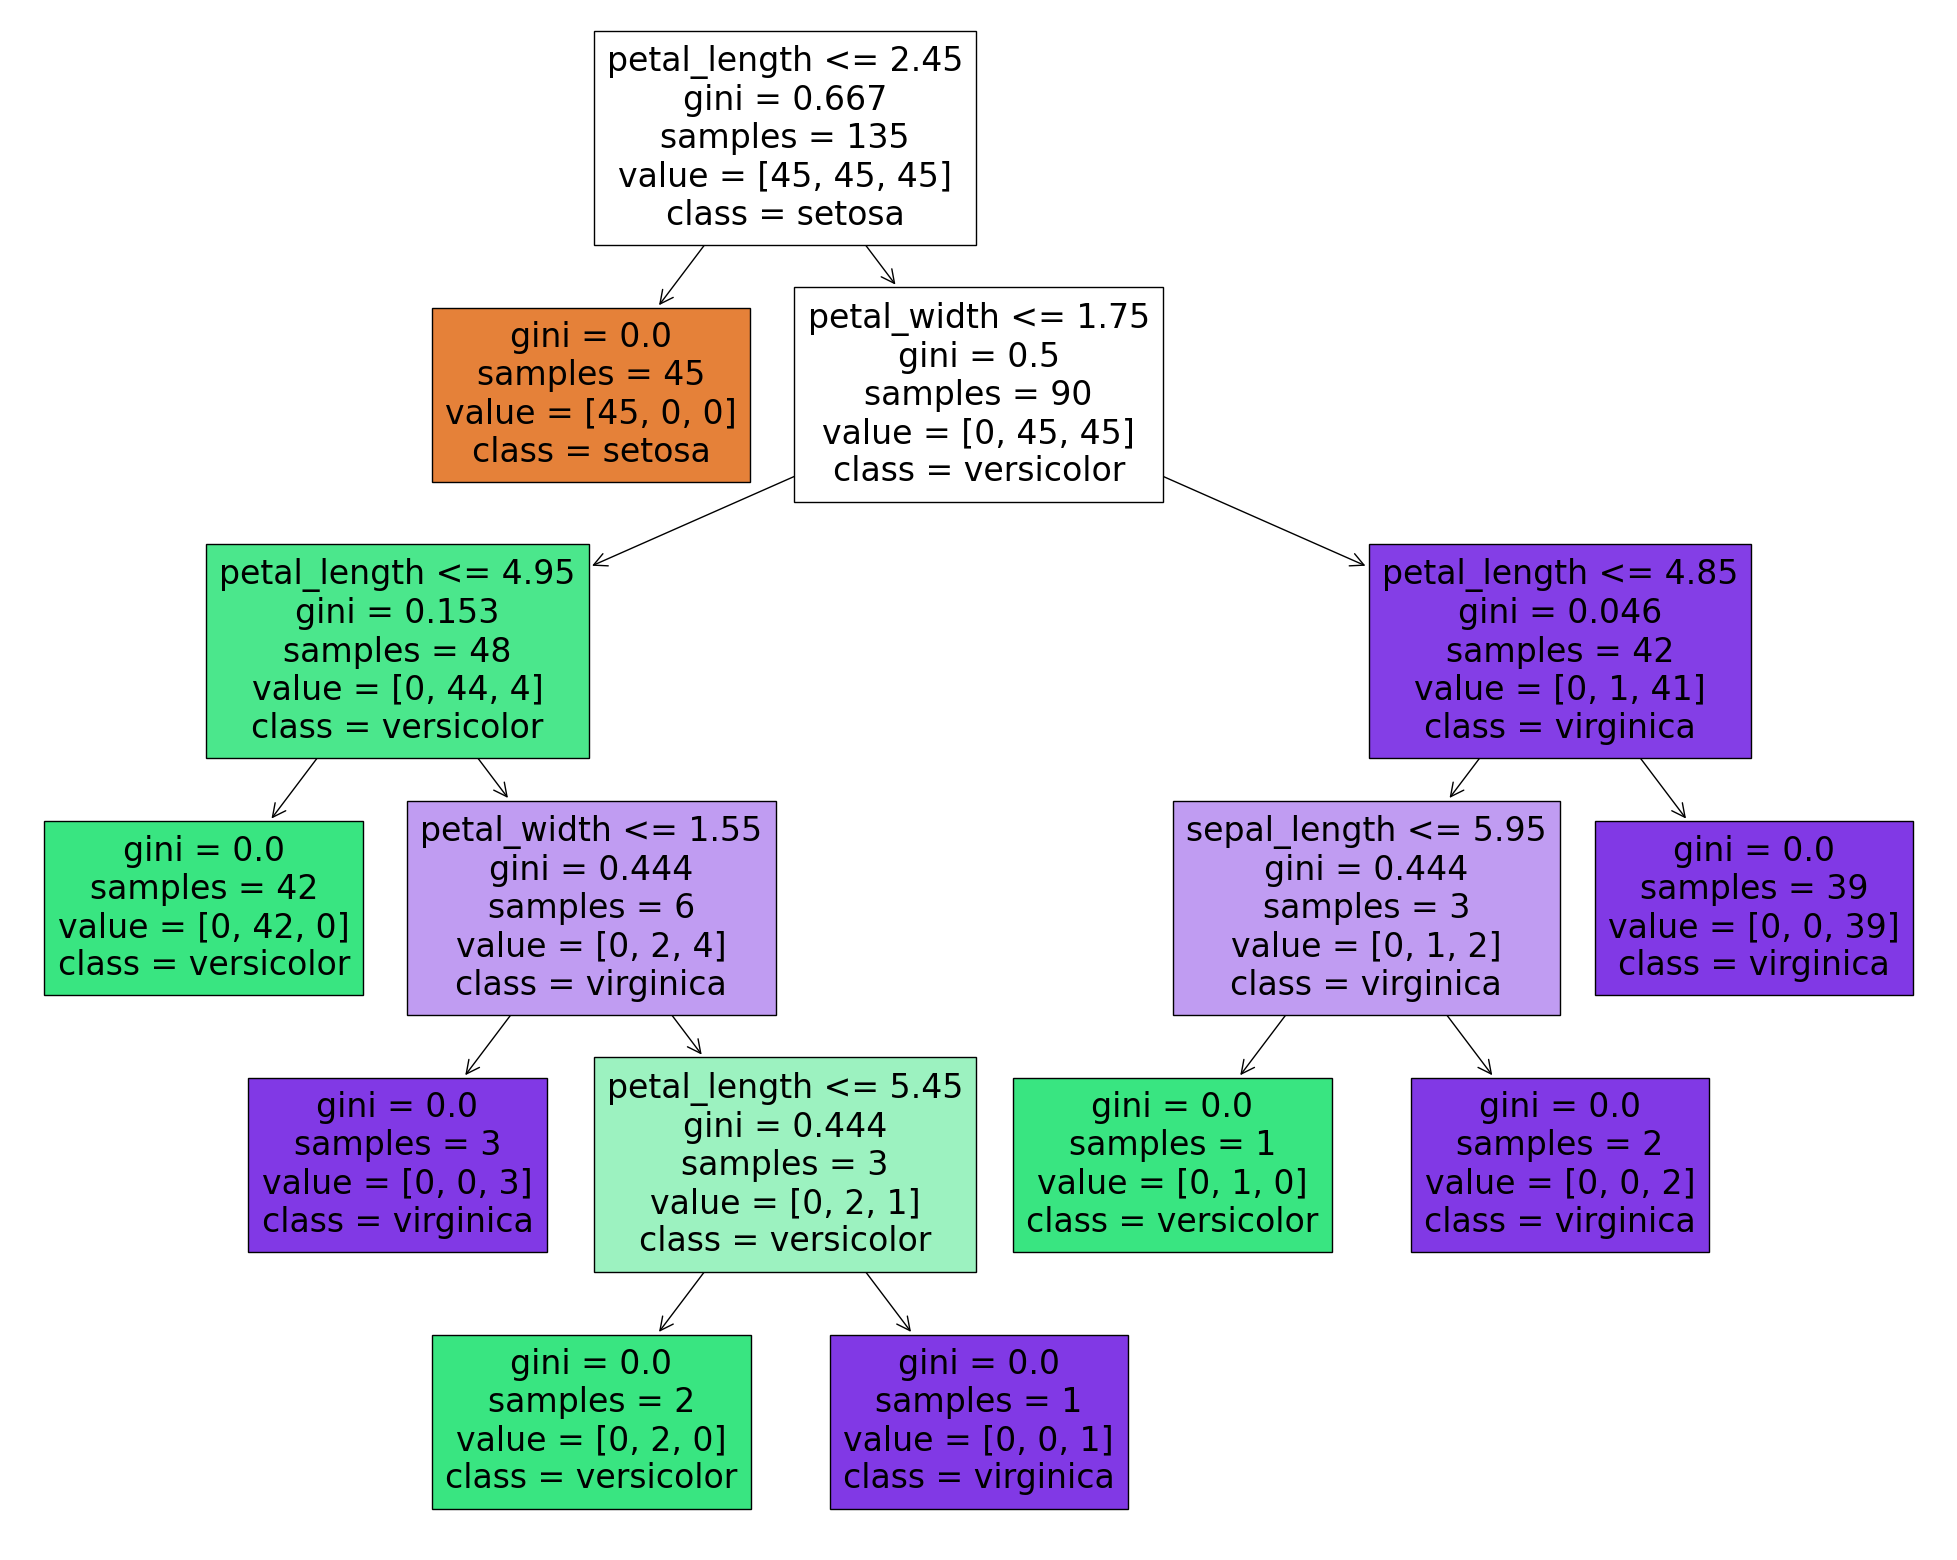

In [18]:
def get_dt_graph(dt_classifier):
    fig = plt.figure(figsize=(25,20))
    _ = tree.plot_tree(dt_classifier,
                       feature_names=X.columns,
                       class_names=['setosa', "versicolor","virginica"],
                       filled=True)
get_dt_graph(dtree)

### Hyperparameter tuning of Decision Tree

In [19]:
from sklearn.model_selection import GridSearchCV,KFold

dt_hp = DecisionTreeClassifier(random_state=43)

params = {'max_depth':[2,3,5,10,15],
          'min_samples_leaf':[3,5,10,15,20],
          'min_samples_split':[8,10,12,18,20,16],
          'criterion':['gini','entropy']}
dt_cv = KFold(n_splits=5)
GS = GridSearchCV(estimator=dt_hp,param_grid=params,cv=dt_cv,n_jobs=-1, verbose=True, scoring='accuracy')


In [20]:
%%time
dt_best=GS.fit(X_train, Y_train)


Fitting 5 folds for each of 300 candidates, totalling 1500 fits
CPU times: total: 875 ms
Wall time: 4.52 s


In [21]:
score_df = pd.DataFrame(GS.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003990,2.861023e-07,0.001995,4.672031e-07,gini,2,3,8,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.925926,0.925926,0.925926,0.962963,0.925926,0.933333,0.014815,97
1,0.003391,4.891426e-04,0.001995,8.341244e-07,gini,2,3,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.925926,0.925926,0.925926,0.962963,0.925926,0.933333,0.014815,97
2,0.003392,4.889292e-04,0.001994,1.433687e-06,gini,2,3,12,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.925926,0.925926,0.925926,0.962963,0.925926,0.933333,0.014815,97
3,0.003791,7.458439e-04,0.002194,3.984452e-04,gini,2,3,18,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.925926,0.925926,0.925926,0.962963,0.925926,0.933333,0.014815,97
4,0.003990,1.092580e-03,0.002394,7.975582e-04,gini,2,3,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.925926,0.925926,0.925926,0.962963,0.925926,0.933333,0.014815,97


In [22]:
score_df.nlargest(3,"mean_test_score")


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
30,0.002993,6.675720e-07,0.001596,0.000489,gini,3,3,8,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",1.0,0.962963,0.962963,0.962963,0.925926,0.962963,0.023424,1
31,0.002593,4.889089e-04,0.001795,0.000399,gini,3,3,10,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",1.0,0.962963,0.962963,0.962963,0.925926,0.962963,0.023424,1
32,0.003391,7.978918e-04,0.001596,0.000489,gini,3,3,12,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",1.0,0.962963,0.962963,0.962963,0.925926,0.962963,0.023424,1


In [23]:
print('Best Parameters:',GS.best_params_,end='\n\n')
print('Best Score:',GS.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 8}

Best Score: 0.9629629629629628


In [26]:
#get_dt_graph(GS)

In [27]:
evaluate_model(GS)

Training accuracy :  0.9777777777777777
Testing accuracy :  0.9333333333333333
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       0.83      1.00      0.91         5
           3       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15



## K Nearest Neighbor

In [29]:


from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,Y_train)
knn_model = knn.predict(X_test)

print(classification_report(Y_test,knn_model))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       0.83      1.00      0.91         5
           3       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15



In [30]:
multilabel_confusion_matrix(Y_test,knn_model)

array([[[10,  0],
        [ 0,  5]],

       [[ 9,  1],
        [ 0,  5]],

       [[10,  0],
        [ 1,  4]]], dtype=int64)

### Model evaluation

In [31]:
evaluate_model(knn)

Training accuracy :  0.9851851851851852
Testing accuracy :  0.9333333333333333
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       0.83      1.00      0.91         5
           3       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15



### Hyper parameter tuning of kNN

In [32]:
from sklearn.model_selection import GridSearchCV,KFold

grid_params = { 'n_neighbors' : [3,5,7,9,11,13,15,20],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
knn_cv = KFold(n_splits=5)
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=knn_cv, n_jobs = -1)



In [52]:
%%time
knn_best = gs.fit(X_train, Y_train)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
CPU times: total: 125 ms
Wall time: 284 ms


In [53]:
print('kNN best Estimator:', gs.best_estimator_)

print('kNN best Parameters:', gs.best_params_)
print('kNN best Score:', gs.best_score_)

kNN best Estimator: KNeighborsClassifier(n_neighbors=11)
kNN best Parameters: {'metric': 'minkowski', 'n_neighbors': 11, 'weights': 'uniform'}
kNN best Score: 0.9777777777777779


In [54]:
score_knn = pd.DataFrame(gs.cv_results_)
score_knn.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002594,0.000489,0.003591,0.000489,minkowski,3,uniform,"{'metric': 'minkowski', 'n_neighbors': 3, 'wei...",1.0,1.0,0.925926,1.0,0.925926,0.970370,0.036289,5
1,0.002793,0.000400,0.002593,0.000489,minkowski,3,distance,"{'metric': 'minkowski', 'n_neighbors': 3, 'wei...",1.0,1.0,0.925926,1.0,0.925926,0.970370,0.036289,5
2,0.003097,0.000127,0.004943,0.000366,minkowski,5,uniform,"{'metric': 'minkowski', 'n_neighbors': 5, 'wei...",1.0,1.0,0.888889,1.0,0.962963,0.970370,0.043192,5
3,0.001931,0.001191,0.003098,0.003473,minkowski,5,distance,"{'metric': 'minkowski', 'n_neighbors': 5, 'wei...",1.0,1.0,0.888889,1.0,0.962963,0.970370,0.043192,5
4,0.002143,0.003712,0.004401,0.004046,minkowski,7,uniform,"{'metric': 'minkowski', 'n_neighbors': 7, 'wei...",1.0,1.0,0.888889,1.0,0.925926,0.962963,0.046849,22


In [55]:
evaluate_model(knn_best)

Training accuracy :  0.9851851851851852
Testing accuracy :  0.9333333333333333
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      0.86      0.92         7
           3       0.75      1.00      0.86         3

    accuracy                           0.93        15
   macro avg       0.92      0.95      0.93        15
weighted avg       0.95      0.93      0.94        15



## Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)

rf.fit(X_train,Y_train)
rf_model = rf.predict(X_test)

print(classification_report(Y_test,rf_model))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      0.86      0.92         7
           3       0.75      1.00      0.86         3

    accuracy                           0.93        15
   macro avg       0.92      0.95      0.93        15
weighted avg       0.95      0.93      0.94        15



In [57]:
evaluate_model(rf)

Training accuracy :  1.0
Testing accuracy :  0.9333333333333333
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      0.86      0.92         7
           3       0.75      1.00      0.86         3

    accuracy                           0.93        15
   macro avg       0.92      0.95      0.93        15
weighted avg       0.95      0.93      0.94        15



### Hyperparameter tuning for Random Forest

In [61]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


rf_param_grid = {'max_samples': [0.1, 0.2, 0.3, 0.4],
                'max_features': [1, 2],
                'n_estimators':[10, 50, 100],
                'max_depth': [8, 9, 10]
                }
rf_cv = KFold(n_splits=5)
rf_grid = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=rf_cv)
best_rf=rf_grid.fit(X_train, Y_train)

In [62]:
print('RF best Parameters:', rf_grid.best_estimator_)
print('RF best Score:', rf_grid.best_score_)

RF best Parameters: RandomForestClassifier(max_depth=9, max_features=1, max_samples=0.2,
                       n_estimators=50)
RF best Score: 0.9703703703703702


In [63]:
evaluate_model(best_rf)

Training accuracy :  0.9629629629629629
Testing accuracy :  0.9333333333333333
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      0.86      0.92         7
           3       0.75      1.00      0.86         3

    accuracy                           0.93        15
   macro avg       0.92      0.95      0.93        15
weighted avg       0.95      0.93      0.94        15



In [ ]:
rf_y_pred = rf_grid.predict(X_test)
print('Accuray:', accuracy_score(Y_test, rf_y_pred))
print('Confusion Matrix:\n', confusion_matrix(Y_test, rf_y_pred))
print('Classification Report:\n', classification_report(Y_test, rf_y_pred))

In [ ]:
rf_y_pred = rf_grid.predict(X_test)
print('Accuray:', accuracy_score(Y_test, rf_y_pred))
print('Confusion Matrix:\n', confusion_matrix(Y_test, rf_y_pred))
print('Classification Report:\n', classification_report(Y_test, rf_y_pred))


## GradientBoostingRegressor

In [64]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100,learning_rate=0.1)

gb.fit(X_train,Y_train)
gb_model = gb.predict(X_test)

print(classification_report(Y_test,gb_model))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      0.86      0.92         7
           3       0.75      1.00      0.86         3

    accuracy                           0.93        15
   macro avg       0.92      0.95      0.93        15
weighted avg       0.95      0.93      0.94        15



### Hyperparameter tuning for Gradient Boosting Classifier

In [65]:
from sklearn.model_selection import GridSearchCV,KFold

gb_grid_param = {'learning_rate': [0.01, 0.05, 0.1, 1],
                 'n_estimators' : [10, 50, 100, 500, 1000],
                 'max_depth': [2, 5, 8, 11],
                 'max_features': [1,2]}
gb_cv = KFold(n_splits=5)
gb_grid = GridSearchCV(GradientBoostingClassifier(), gb_grid_param, cv=gb_cv)
gb_grid.fit(X_train, Y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 1],
                         'max_depth': [2, 5, 8, 11], 'max_features': [1, 2],
                         'n_estimators': [10, 50, 100, 500, 1000]})

In [49]:
print('GB best Parameters:', gb_grid.best_estimator_)
print('GB best Score:', gb_grid.best_score_)

GB best Parameters: GradientBoostingClassifier(learning_rate=0.05, max_depth=2, max_features=1,
                           n_estimators=10)
GB best Score: 0.9555555555555555


In [52]:
gb_y_pred = gb_grid.predict(X_test)
print('Accuray:', accuracy_score(Y_test, gb_y_pred))
print('Confusion Matrix:\n', confusion_matrix(Y_test, gb_y_pred))
print('Classification Report:\n', classification_report(Y_test, gb_y_pred))


Accuray: 0.9333333333333333
Confusion Matrix:
 [[6 0 0]
 [0 3 0]
 [0 1 5]]
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
           2       0.75      1.00      0.86         3
           3       1.00      0.83      0.91         6

    accuracy                           0.93        15
   macro avg       0.92      0.94      0.92        15
weighted avg       0.95      0.93      0.94        15



In [204]:
gb_grid_param = {'learning_rate': [0.01, 0.05, 0.1, 1],
                 'n_estimators' : [10, 50, 100, 500, 1000],
                 'max_depth': [2, 5, 8, 11],
                 'max_features': [1,2]}
gb_cv = KFold(n_splits=5)
gb_grid = GridSearchCV(GradientBoostingClassifier(), gb_grid_param, cv=gb_cv)
gb_grid.fit(X_train, Y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 1],
                         'max_depth': [2, 5, 8, 11], 'max_features': [1, 2],
                         'n_estimators': [10, 50, 100, 500, 1000]})

In [ ]:
print('GB best Parameters:', gb_grid.best_estimator_)
print('GB best Score:', gb_grid.best_score_)

In [ ]:
gb_y_pred = gb_grid.predict(X_test)
print('Accuray:', accuracy_score(Y_test, gb_y_pred))
print('Confusion Matrix:\n', confusion_matrix(Y_test, gb_y_pred))
print('Classification Report:\n', classification_report(Y_test, gb_y_pred))
